In [100]:
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl

# %matplotlib tk
%matplotlib inline
# 解决中文显示问题
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
info= pd.read_csv("./rant_house2.txt",sep=",",encoding = "gbk",names = ["id","hid","title","village","area","url","price","type","square","line","station","meter","score","ratnum","addtime"])

In [101]:
info = info[info["area"]!="[]"]

# 2.	得到各个区域的房源个数

In [102]:
district_house_num = info.groupby("area")["area"].count()
district_house_num

area
嘉定     26
宝山    272
徐汇      6
普陀      4
杨浦      7
松江    248
浦东     64
虹口      9
长宁      1
闵行    162
青浦     53
静安     13
Name: area, dtype: int64

# 3.	查看房源平均价格最贵的三个区域

In [103]:
district_expensive=info.groupby("area")["price"].mean()
district_expensive3=district_expensive.sort_values(ascending = False).head(3)
district_expensive3

area
虹口    4284.444444
普陀    3470.000000
静安    3170.000000
Name: price, dtype: float64

# 4.	查看各个区域房价最贵的两个小区

In [104]:
district_expensive=info.groupby("village")["price"].mean()
district_expensive2=district_expensive.sort_values(ascending = False).head(2)
district_expensive2

village
中虹明珠苑    12000.0
上钞桂花苑     7800.0
Name: price, dtype: float64

# 5.	查看浦东距离站点最近的10个房源

In [105]:
# district_expensive=info.groupby("village")["price"].mean()
# district_expensive2=district_expensive.sort_values(ascending = False).head(2)
# district_expensive2
pudong1 = info[info["area"]=="浦东"]
pudong1
pudong = pudong1.sort_values(by = "meter",ascending = False).head(10)
pudong

,id,hid,title,village,area,url,price,type,square,line,station,meter,score,ratnum,addtime
684,684,886898,汇福家园祥和里东-浦东 带阳台 新上架 电梯房 非一楼,汇福家园祥和里东,浦东,http://sh.baletu.com/house/886898.html?entranc...,3600,整租,80,16,-,1806,4.5,3446人评论,2019-10-28 发布
331,331,6092342,永业小区（永业路94弄）-浦东 独卫 新上架 非一楼,永业小区（永业路94弄）,浦东,http://sh.baletu.com/house/6092342.html?entran...,2200,合租,18,12,-,1645,4.5,5165人评论,2019-10-28 发布
156,156,5963268,长岛花苑-浦东 新上架 电梯房,长岛花苑,浦东,http://sh.baletu.com/house/5963268.html?entran...,2500,合租,20,6,-,1531,4.5,5165人评论,2019-10-28 发布
306,306,6102459,新里绿地崴廉公寓-浦东 独卫 保洁服务 新上架 电梯房 非一楼,新里绿地崴廉公寓,浦东,http://sh.baletu.com/house/6102459.html?entran...,2200,合租,17,12,-,1454,4.5,5165人评论,2019-10-28 发布
105,105,6102458,新里绿地崴廉公寓-浦东 独卫 新上架 电梯房 非一楼,新里绿地崴廉公寓,浦东,http://sh.baletu.com/house/6102458.html?entran...,2200,合租,16,12,-,1454,4.5,5165人评论,2019-10-28 发布
312,312,4281516,汇福家园健康里-浦东 独卫 保洁服务 新上架 电梯房 非一楼,汇福家园健康里,浦东,http://sh.baletu.com/house/4281516.html?entran...,1300,合租,16,16,-,1381,4.5,3446人评论,2019-10-28 发布
62,62,6045596,新高苑二期（新高苑兰园）-浦东 新上架 电梯房 非一楼,新高苑二期（新高苑兰园）,浦东,http://sh.baletu.com/house/6045596.html?entran...,2200,合租,16,12,-,1345,4.5,5165人评论,2019-10-28 发布
609,609,6027569,新高苑二期（新高苑兰园）-浦东 新上架 电梯房 非一楼,新高苑二期（新高苑兰园）,浦东,http://sh.baletu.com/house/6027569.html?entran...,2100,合租,20,12,-,1345,4.5,5165人评论,2019-10-28 发布
356,356,6027571,新高苑二期（新高苑兰园）-浦东 新上架 电梯房 非一楼,新高苑二期（新高苑兰园）,浦东,http://sh.baletu.com/house/6027571.html?entran...,2000,合租,20,12,-,1345,4.5,5165人评论,2019-10-28 发布
735,735,5189641,汇福家园兴盛里北区-浦东 新上架 电梯房 非一楼 主卧,汇福家园兴盛里北区,浦东,http://sh.baletu.com/house/5189641.html?entran...,1300,合租,22,16,-,1339,4.5,3446人评论,2019-10-28 发布


# 6.	查看距离各个地铁最近的三个房源(每条线路3个房源)

In [106]:
subway = info[info["line"]!="-"]
subway
def f(x):
    return x.sort_values(by = "meter",ascending = True).head(3)
subway3 = subway.groupby("line").apply(f)
subway3

id      hid                                        title  \
line                                                                  
1    196  196  5694437        共和新路4719弄小区（共和小区）-宝山 近地铁 新上架 智能电表 非一楼   
     146  146  3531998                     地铁明珠苑-闵行 近地铁 新上架 电梯房 非一楼   
     581  581   768783                        江南苑-闵行 近地铁 新上架 非一楼 朝南   
10   678  678  1115355           市光新苑-杨浦 近地铁 保洁服务 新上架 电梯房 非一楼 主卧 朝南   
     613  613  1164956                        新江湾戎德苑-杨浦 新上架 电梯房 非一楼   
     58    58   868885                   政立苑（政立路639弄）-杨浦 独卫 新上架 非一楼   
11   108  108  5552074                      吴杨小区-嘉定 独卫 保洁服务 新上架 非一楼   
     12    12  3305616                    宫宵公寓-嘉定 近地铁 新上架 非一楼 主卧 朝南   
     245  245  6143494                          紫荆四村-嘉定 近地铁 新上架 非一楼   
12   834  834  5937433                             樟树缘公寓-杨浦 新上架 非一楼   
     710  710  5937451                          樟树缘公寓-杨浦 新上架 非一楼 朝南   
     691  691  5996788                平南二村-闵行 近地铁 带阳台 维修服务 新上架 智能电表   
13   115  115   887633     泰宸沙河茗苑-嘉定 近地铁 独卫 带阳台 新上架 电梯房 独立厨房 非一楼 朝南   
     294  294  5999868            泰宸沙河茗苑-嘉定 近地铁 独卫 保洁服务 新上架 电梯房 非一楼   
     327  327  4087512                真源小区（真光路962弄）-普陀 新上架 智能电表 非一楼   
16   376  376  2654066       海曲雅苑-浦东 近地铁 独卫 带阳台 新上架 电梯房 智能电表 非一楼 主卧   
     735  735  5189641                  汇福家园兴盛里北区-浦东 新上架 电梯房 非一楼 主卧   
     312  312  4281516               汇福家园健康里-浦东 独卫 保洁服务 新上架 电梯房 非一楼   
17   44    44  5462969                       蟠龙馨苑-青浦 近地铁 独卫 新上架 电梯房   
     60    60  5463384                       蟠龙馨苑-青浦 近地铁 独卫 新上架 电梯房   
     381  381  5466502           蟠龙馨苑-青浦 近地铁 独卫 保洁服务 新上架 电梯房 非一楼 朝南   
2    109  109   795696                       通协小区-长宁 独卫 新上架 电梯房 非一楼   
     102  102  1438195                    二联馨苑-闵行 新上架 电梯房 非一楼 主卧 朝南   
     305  305  1090247                          二联馨苑-闵行 新上架 电梯房 非一楼   
3    224  224  3649232                   金象大厦-虹口 近地铁 独卫 新上架 电梯房 非一楼   
     385  385  1115492                   枫叶公寓-虹口 近地铁 新上架 电梯房 非一楼 朝南   
     731  731  3297776        三九大厦-虹口 近地铁 带阳台 保洁服务 新上架 电梯房 智能电表 非一楼   
4    43    43  5542045                   江南二村-徐汇 近地铁 新上架 电梯房 非一楼 主卧   
     39    39  6155939                          江南一村-徐汇 近地铁 新上架 非一楼   
     843  843  3334290                          江南一村-徐汇 近地铁 新上架 非一楼   
5    688  688   812517                      绿水家园-闵行 近地铁 新上架 电梯房 非一楼   
     799  799   812514                  绿水家园-闵行 近地铁 带阳台 新上架 电梯房 非一楼   
     200  200  4439708                    君临天下花园-闵行 近地铁 带阳台 新上架 非一楼   
6    494  494   182324  浦江东旭公寓东区-浦东 近地铁 独卫 新上架 电梯房 独立厨房 智能电表 非一楼 朝南   
     244  244   514093          浦江东旭公寓东区-浦东 近地铁 独卫 新上架 电梯房 智能电表 非一楼   
     284  284   751383  浦江东旭公寓东区-浦东 近地铁 独卫 新上架 电梯房 独立厨房 智能电表 非一楼 朝南   
7    861  861  1083771                         锦秋花园二期-宝山 近地铁 独卫 新上架   
     97    97   686340                锦秋花园二期-宝山 近地铁 独卫 新上架 独立厨房 非一楼   
     708  708   452128                      锦秋花园二期-宝山 近地铁 独卫 新上架 主卧   
8    250  250  5579356                          会铁小区-静安 近地铁 新上架 非一楼   
     408  408  6022880                        光华坊-静安 近地铁 独卫 新上架 非一楼   
     318  318  3233054        南杨小区南区（长清路773弄）-浦东 近地铁 独卫 带阳台 新上架 非一楼   
9    617  617  1227460                  绿地云天坊-松江 近地铁 新上架 电梯房 非一楼 朝南   
     317  317  1545487           祥和公寓（横港公路）-松江 近地铁 新上架 电梯房 智能电表 非一楼   
     219  219   538786                          亭汇花苑-松江 近地铁 新上架 非一楼   

                    village area  \
line                               
1    196  共和新路4719弄小区（共和小区）   宝山   
     146              地铁明珠苑   闵行   
     581                江南苑   闵行   
10   678               市光新苑   杨浦   
     613             新江湾戎德苑   杨浦   
     58        政立苑（政立路639弄）   杨浦   
11   108               吴杨小区   嘉定   
     12                宫宵公寓   嘉定   
     245               紫荆四村   嘉定   
12   834              樟树缘公寓   杨浦   
     710              樟树缘公寓   杨浦   
     691               平南二村   闵行   
13   115             泰宸沙河茗苑   嘉定   
     294             泰宸沙河茗苑   嘉定   
     327      真源小区（真光路962弄）   普陀   
16   376               海曲雅苑   浦东   
     735          汇福家园兴盛里

# 7.	查看每平米价格(总价/平方) 最贵的10个房源

In [107]:
info["mean_price"] = info["price"]/info["square"]
info.sort_values(by = "mean_price",ascending = False).head(10)

,id,hid,title,village,area,url,price,type,square,line,station,meter,score,ratnum,addtime,mean_price
93,93,562892,爱博六村-闵行 独卫 保洁服务 维修服务 新上架 电梯房 智能电表 非一楼,爱博六村,闵行,http://sh.baletu.com/house/562892.html?entranc...,2500,合租,7,-,申长北路北翟路,140,4.5,9892人评论,2019-10-28 发布,357.142857
11,11,5953025,爵士大厦（阜兴世纪公馆）-浦东 独卫 保洁服务 新上架 电梯房 智能电表 非一楼,爵士大厦（阜兴世纪公馆）,浦东,http://sh.baletu.com/house/5953025.html?entran...,4800,合租,15,-,-,382,4.5,5165人评论,2019-10-28 发布,320.000000
351,351,3114072,康桥水都（莲花山路817弄）-宝山 近地铁 独卫 新上架 电梯房 智能电表,康桥水都（莲花山路817弄）,宝山,http://sh.baletu.com/house/3114072.html?entran...,2690,合租,10,1,-,827,4.5,20475人评论,2019-10-28 发布,269.000000
764,764,574517,爱博二村-闵行 独卫 维修服务 新上架 电梯房 智能电表,爱博二村,闵行,http://sh.baletu.com/house/574517.html?entranc...,2880,合租,11,-,申滨路宁虹路,244,4.5,9892人评论,2019-10-28 发布,261.818182
260,260,562889,爱博六村-闵行 独卫 维修服务 新上架 电梯房 智能电表 非一楼,爱博六村,闵行,http://sh.baletu.com/house/562889.html?entranc...,2580,合租,10,-,申长北路北翟路,140,4.5,9892人评论,2019-10-28 发布,258.000000
547,547,5848621,高申南苑-浦东 独卫 保洁服务 新上架 电梯房 非一楼,高申南苑,浦东,http://sh.baletu.com/house/5848621.html?entran...,2400,合租,10,6,-,913,4.5,5165人评论,2019-10-28 发布,240.000000
519,519,3332357,海虹欣苑（江场路1099弄）-静安 新上架 非一楼,海虹欣苑（江场路1099弄）,静安,http://sh.baletu.com/house/3332357.html?entran...,2360,合租,10,1,-,1370,4.5,10802人评论,2019-10-28 发布,236.000000
220,220,574510,爱博二村-闵行 独卫 维修服务 新上架 电梯房 智能电表,爱博二村,闵行,http://sh.baletu.com/house/574510.html?entranc...,3200,合租,14,-,申滨路宁虹路,244,4.5,9892人评论,2019-10-28 发布,228.571429
236,236,5187658,爱博三村-闵行 独卫 维修服务 新上架 电梯房 智能电表 非一楼,爱博三村,闵行,http://sh.baletu.com/house/5187658.html?entran...,3988,合租,18,-,宁虹路申滨路,297,4.5,9892人评论,2019-10-28 发布,221.555556
206,206,5956348,虹凉馨苑-静安 新上架 非一楼,虹凉馨苑,静安,http://sh.baletu.com/house/5956348.html?entran...,2160,合租,10,1,-,1382,4.5,10802人评论,2019-10-28 发布,216.000000


# 8.	看房价最贵的10个小区(按照每个小区的房价均值)

In [108]:
village_mean_price = info.groupby("village").mean()
village_mean_price.sort_values(by ="price",ascending = False)

,id,hid,price,square,meter,score,mean_price
village,,,,,,,
中虹明珠苑,180.000000,6.022879e+06,12000.000000,124.000000,522.000000,4.5,96.774194
上钞桂花苑,177.000000,3.600155e+06,7800.000000,98.000000,1018.000000,4.5,79.591837
会铁小区,250.000000,5.579356e+06,6760.000000,60.000000,288.000000,4.5,112.666667
普善小区,801.000000,6.135941e+06,6760.000000,60.000000,547.000000,4.5,112.666667
中建锦绣天地,319.000000,1.307438e+06,6500.000000,80.000000,1445.000000,4.5,81.250000
经纬观澜泓郡家园（经纬城市绿洲三期）,552.000000,8.012570e+05,5800.000000,100.000000,754.000000,4.5,58.000000
广中路450号,796.000000,5.192639e+06,5560.000000,50.000000,1120.000000,4.5,111.200000
龙潭小区（沪太路1170弄）,847.000000,6.040296e+06,5200.000000,65.000000,370.000000,4.5,80.000000
南杨小区南区（长清路773弄）,318.000000,3.233054e+06,4900.000000,45.000000,586.000000,4.5,108.888889


# 9.	查找在浦东或者宝山,房价为2000-2500,大小为10-20m的房源

In [109]:
aim1 = info[info["area"] == "浦东"]
aim2 =info[info["area"]=="宝山"]
aim0 = pd.concat([aim1,aim2],axis = 0)
aim = aim0[aim0["price"]<2500]
aim = aim[aim["price"]>2000]
aim = aim[aim["square"]<20]
aim = aim[aim["square"]>10]
aim
#  and info["price"]<2500 and info["price"]>2000 and info["square"]<20 and info["square"]>10]

,id,hid,title,village,area,url,price,type,square,line,station,meter,score,ratnum,addtime,mean_price
62,62,6045596,新高苑二期（新高苑兰园）-浦东 新上架 电梯房 非一楼,新高苑二期（新高苑兰园）,浦东,http://sh.baletu.com/house/6045596.html?entran...,2200,合租,16,12,-,1345,4.5,5165人评论,2019-10-28 发布,137.500000
105,105,6102458,新里绿地崴廉公寓-浦东 独卫 新上架 电梯房 非一楼,新里绿地崴廉公寓,浦东,http://sh.baletu.com/house/6102458.html?entran...,2200,合租,16,12,-,1454,4.5,5165人评论,2019-10-28 发布,137.500000
147,147,5588765,云台二小区（昌里东路190弄）-浦东 新上架 非一楼,云台二小区（昌里东路190弄）,浦东,http://sh.baletu.com/house/5588765.html?entran...,2200,合租,16,-,-,250,4.5,1290人评论,2019-10-28 发布,137.500000
176,176,2739655,汇郡海棠苑（浦东）-浦东 新上架 电梯房 智能电表 非一楼,汇郡海棠苑（浦东）,浦东,http://sh.baletu.com/house/2739655.html?entran...,2200,合租,16,6,-,1018,4.5,4628人评论,2019-10-28 发布,137.500000
306,306,6102459,新里绿地崴廉公寓-浦东 独卫 保洁服务 新上架 电梯房 非一楼,新里绿地崴廉公寓,浦东,http://sh.baletu.com/house/6102459.html?entran...,2200,合租,17,12,-,1454,4.5,5165人评论,2019-10-28 发布,129.411765
331,331,6092342,永业小区（永业路94弄）-浦东 独卫 新上架 非一楼,永业小区（永业路94弄）,浦东,http://sh.baletu.com/house/6092342.html?entran...,2200,合租,18,12,-,1645,4.5,5165人评论,2019-10-28 发布,122.222222
776,776,4881418,高申北苑-浦东 独卫 新上架 电梯房 非一楼,高申北苑,浦东,http://sh.baletu.com/house/4881418.html?entran...,2400,合租,18,6,-,802,4.5,5165人评论,2019-10-28 发布,133.333333
45,45,1565913,共富一村西区-宝山 近地铁 带阳台 保洁服务 新上架 电梯房 智能电表 非一楼,共富一村西区,宝山,http://sh.baletu.com/house/1565913.html?entran...,2050,合租,18,1,-,566,4.5,20475人评论,2019-10-28 发布,113.888889
70,70,4477329,天馨花园-宝山 近地铁 独卫 保洁服务 新上架 智能电表 非一楼,天馨花园,宝山,http://sh.baletu.com/house/4477329.html?entran...,2150,合租,18,1,-,784,4.5,20475人评论,2019-10-28 发布,119.444444
208,208,775065,当代高邸（聚丰园路105弄）-宝山 近地铁 独卫 新上架,当代高邸（聚丰园路105弄）,宝山,http://sh.baletu.com/house/775065.html?entranc...,2400,合租,18,7,-,498,4.5,3420人评论,2019-10-28 发布,133.333333


# 10.	查找整租房源里,距离站点小于1000米的房源,从近到远排序

In [110]:
entire_rant = info[info["type"] == "整租"]
entire_rant = entire_rant[entire_rant["meter"]<1000].sort_values(by ="meter",ascending = True)
entire_rant

,id,hid,title,village,area,url,price,type,square,line,station,meter,score,ratnum,addtime,mean_price
394,394,5889261,泰安馨苑B区-青浦 独卫 新上架 非一楼 朝南,泰安馨苑B区,青浦,http://sh.baletu.com/house/5889261.html?entran...,2300,整租,78,-,邱家港路西洋淀东路,69,4.5,924人评论,2019-10-28 发布,29.487179
181,181,3380520,五浦汇B区崧子苑-青浦 带阳台 新上架 电梯房 非一楼,五浦汇B区崧子苑,青浦,http://sh.baletu.com/house/3380520.html?entran...,4000,整租,130,-,崧子浦路赵屯浦路(东),92,4.5,924人评论,2019-10-28 发布,30.769231
325,325,5926170,五浦汇B区崧子苑-青浦 独卫 新上架 电梯房 非一楼,五浦汇B区崧子苑,青浦,http://sh.baletu.com/house/5926170.html?entran...,3800,整租,80,-,崧子浦路赵屯浦路(东),92,4.5,924人评论,2019-10-28 发布,47.500000
773,773,5813224,崧泽华城佳福雅苑东区（崧泉路977弄）-青浦 独卫 带阳台 新上架 电梯房 非一楼,崧泽华城佳福雅苑东区（崧泉路977弄）,青浦,http://sh.baletu.com/house/5813224.html?entran...,3500,整租,120,-,秀禾路崧泉路,109,4.5,286人评论,2019-10-28 发布,29.166667
300,300,265075,崧泽华城秀景苑3期-青浦 独卫 带阳台 保洁服务 新上架 电梯房 非一楼,崧泽华城秀景苑3期,青浦,http://sh.baletu.com/house/265075.html?entranc...,4000,整租,78,-,秀源路崧泉路,140,4.5,286人评论,2019-10-28 发布,51.282051
119,119,451541,庆华新村（庆华一村）-青浦 带阳台 新上架 非一楼,庆华新村（庆华一村）,青浦,http://sh.baletu.com/house/451541.html?entranc...,2500,整租,60,-,青安路医院路,158,4.5,924人评论,2019-10-28 发布,41.666667
299,299,817404,祁连四村（祁连山路2777弄）-宝山 近地铁 带阳台 新上架 非一楼,祁连四村（祁连山路2777弄）,宝山,http://sh.baletu.com/house/817404.html?entranc...,6000,整租,108,-,-,166,4.5,2732人评论,2019-10-28 发布,55.555556
693,693,4611061,五浦汇A区新塘苑-青浦 独卫 新上架 电梯房 非一楼,五浦汇A区新塘苑,青浦,http://sh.baletu.com/house/4611061.html?entran...,3800,整租,135,-,崧子浦路赵屯浦路(西),168,4.5,924人评论,2019-10-28 发布,28.148148
542,542,6078138,五浦汇A区新塘苑-青浦 独卫 新上架 电梯房 非一楼 朝南,五浦汇A区新塘苑,青浦,http://sh.baletu.com/house/6078138.html?entran...,3200,整租,80,-,崧子浦路赵屯浦路(西),168,4.5,924人评论,2019-10-28 发布,40.000000
752,752,5854980,同华大厦-浦东 独卫 新上架 智能电表 非一楼,同华大厦,浦东,http://sh.baletu.com/house/5854980.html?entran...,3700,整租,43,-,金港路金湘路,209,4.5,14140人评论,2019-10-28 发布,86.046512


# 11.	任意图图表示：房价最贵的10个小区 

In [117]:
info.groupby("village").mean().sort_values(by ="price",ascending = "False").head(10)

,id,hid,price,square,meter,score,mean_price
village,,,,,,,
新上海弄里人家北区,148.0,1128076.0,550.0,12.0,1668.0,4.5,45.833333
同济城市雅筑（环城路860号）,665.0,3341228.0,650.0,12.0,1612.0,4.5,54.166667
荣乐三村,267.0,3123533.0,650.0,10.0,824.0,4.5,65.000000
盈港花园别墅,584.0,5999872.0,700.0,10.0,85.0,4.5,70.000000
茸联苑,749.0,1067163.5,724.5,11.0,162.0,4.5,66.625000
九亭苑,400.0,6118208.0,750.0,10.0,1137.0,4.5,75.000000
绿波苑,759.0,6081943.0,800.0,15.0,1655.0,4.5,53.333333
兰园别墅,559.0,5800662.5,800.0,14.5,224.0,4.5,55.769231
樟馨家园,641.0,4655737.0,800.0,15.0,949.0,4.5,53.333333


# 12.	任意图每个区域的平均房价    

In [111]:
mean_price = info.groupby("area")["price"].mean()
mean_price

area
嘉定    1465.000000
宝山    2191.492647
徐汇    2066.666667
普陀    3470.000000
杨浦    2564.285714
松江    1535.423387
浦东    1966.718750
虹口    4284.444444
长宁    2500.000000
闵行    2398.876543
青浦    2126.792453
静安    3170.000000
Name: price, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

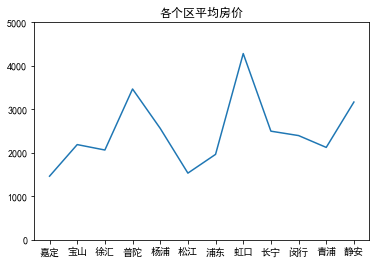

In [113]:
plt.plot(mean_price)
plt.ylim(0,5000)
plt.title("各个区平均房价")
plt.show